# professor's stolen code

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [15]:
# read Iris data set

#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [16]:
IC = np.unique(IA[:,4]) #classification of iris
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [17]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


In [18]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1]) #return array of 0's 
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

# AS01 Using versicolor and virginica

# ====6 Cases using 2 features ====

## Sepal Length VS Sepal Width #1 

In [20]:
cdx = np.array([1,2]) #Choosing Versicolor and Virginica

In [21]:
fdx1 = np.array([0,1]) #Choosing feature

In [22]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx1[0]]
        NF[j,1] = IA[i,fdx1[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx1[0]]
        NF[j,1] = IA[i,fdx1[1]]
        j += 1
    i += 1

In [23]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

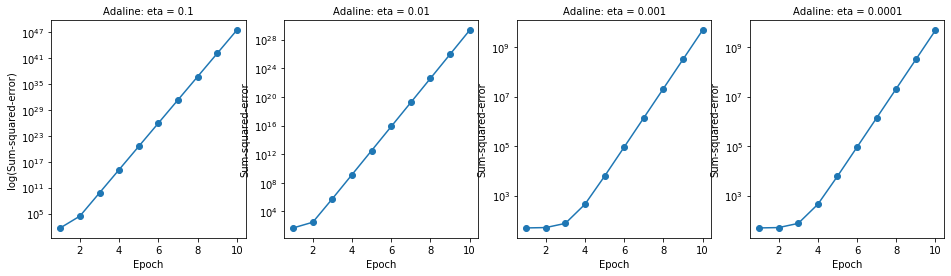

In [24]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

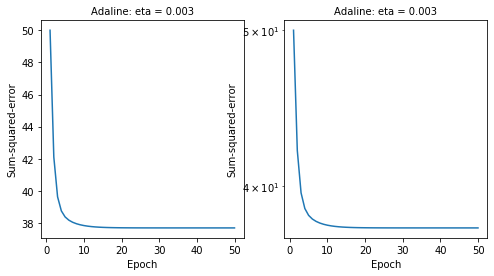

In [25]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

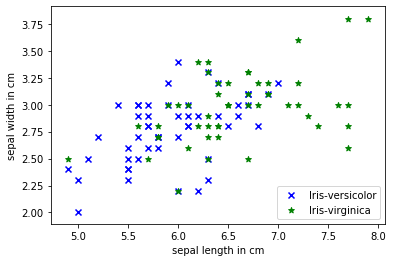

In [26]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx1[0]])
plt.ylabel(IrisF[fdx1[1]])
plt.legend(loc='lower right')
plt.show()

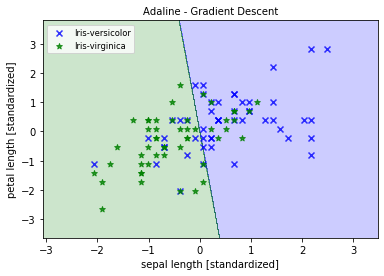

In [27]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [28]:
print(ada.accuracy(NF_Std, NC))

0.75


## Sepal length vs Petal Length #2

In [29]:
fdx2 = np.array([0,2])

In [30]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx2[0]]
        NF[j,1] = IA[i,fdx2[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx2[0]]
        NF[j,1] = IA[i,fdx2[1]]
        j += 1
    i += 1

In [31]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

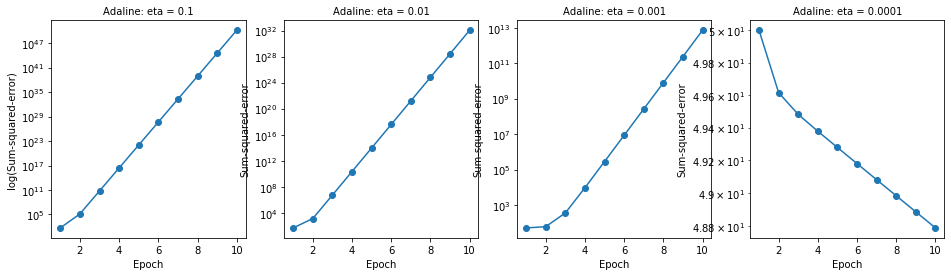

In [32]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

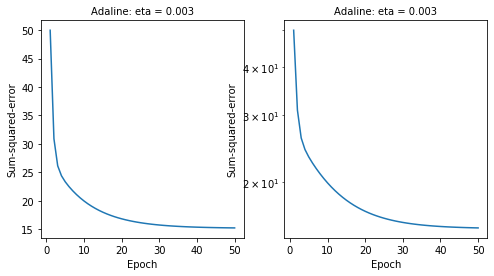

In [33]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

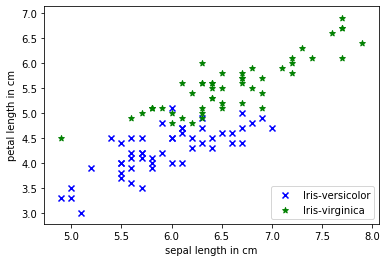

In [34]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx2[0]])
plt.ylabel(IrisF[fdx2[1]])
plt.legend(loc='lower right')
plt.show()

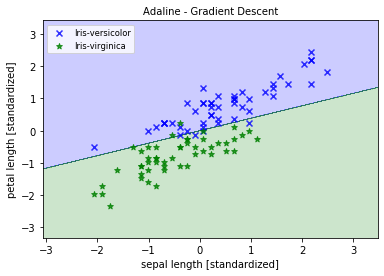

In [35]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [36]:
print(ada.accuracy(NF_Std, NC))

0.94


## sepal length vs petal width #3

In [37]:
fdx3 = np.array([0,3])

In [38]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx3[0]]
        NF[j,1] = IA[i,fdx3[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx3[0]]
        NF[j,1] = IA[i,fdx3[1]]
        j += 1
    i += 1

In [39]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

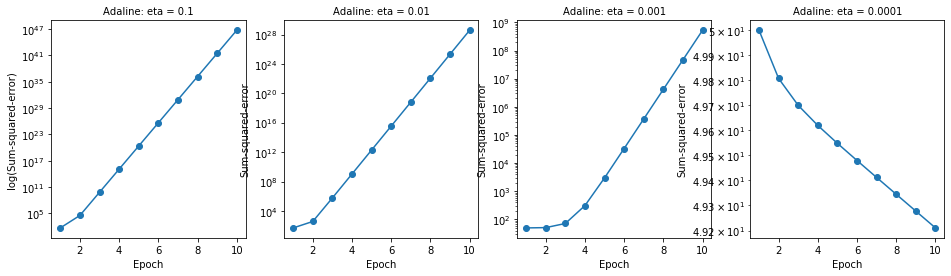

In [40]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

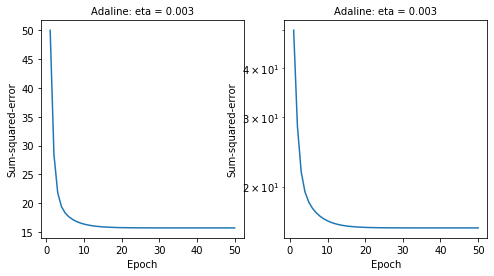

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

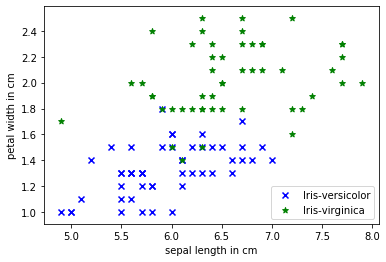

In [42]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx3[0]])
plt.ylabel(IrisF[fdx3[1]])
plt.legend(loc='lower right')
plt.show()

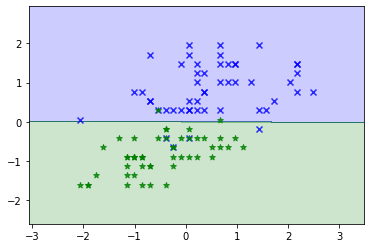

In [43]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [44]:
print(ada.accuracy(NF_Std, NC))

0.94


##  Sepal width vs petal length #4

In [45]:
fdx4 = np.array([1,2])

In [46]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx4[0]]
        NF[j,1] = IA[i,fdx4[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx4[0]]
        NF[j,1] = IA[i,fdx4[1]]
        j += 1
    i += 1

In [47]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

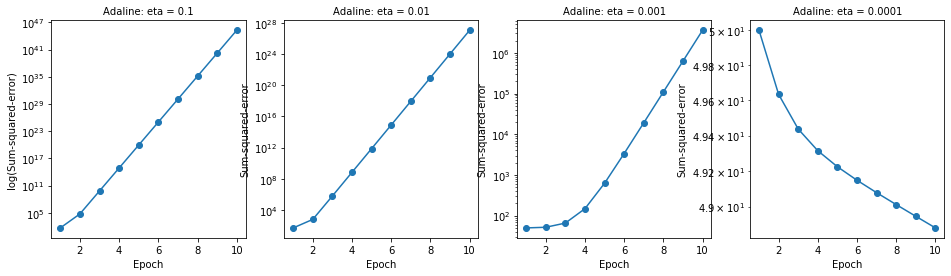

In [48]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

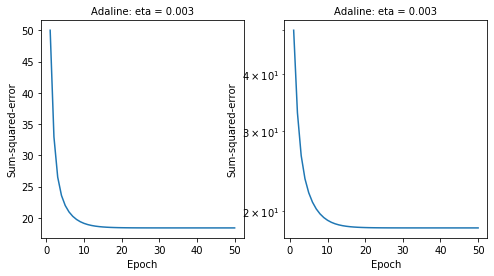

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

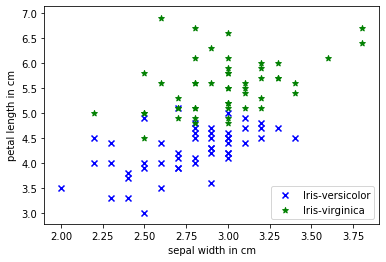

In [50]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx4[0]])
plt.ylabel(IrisF[fdx4[1]])
plt.legend(loc='lower right')
plt.show()

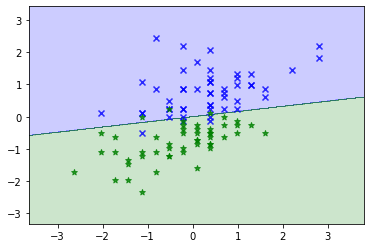

In [51]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [52]:
print(ada.accuracy(NF_Std, NC))

0.9299999999999999


## Sepal Width vs Peta Width #5

In [53]:
fdx5 = np.array([1,3])

In [54]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx5[0]]
        NF[j,1] = IA[i,fdx5[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx5[0]]
        NF[j,1] = IA[i,fdx5[1]]
        j += 1
    i += 1

In [55]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

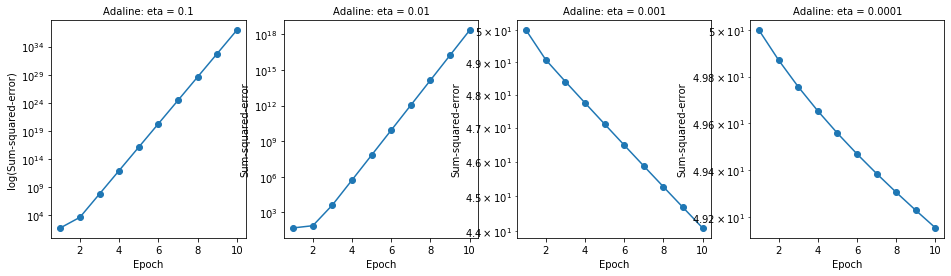

In [56]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

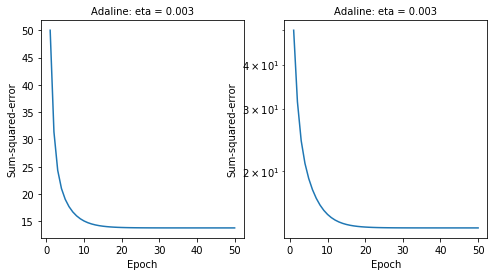

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

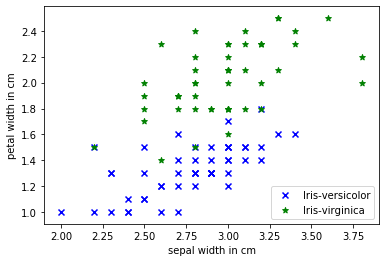

In [58]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx5[0]])
plt.ylabel(IrisF[fdx5[1]])
plt.legend(loc='lower right')
plt.show()

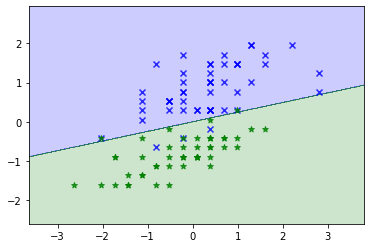

In [59]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [60]:
print(ada.accuracy(NF_Std, NC))

0.95


## Petal length vs Petal width #6

In [61]:
fdx6 = np.array([2,3])

In [62]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx6[0]]
        NF[j,1] = IA[i,fdx6[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx6[0]]
        NF[j,1] = IA[i,fdx6[1]]
        j += 1
    i += 1

In [63]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

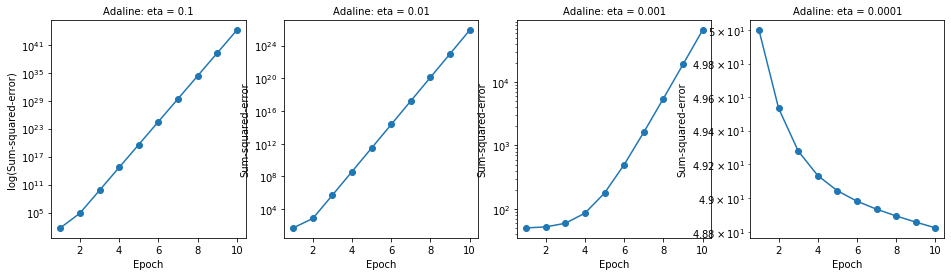

In [64]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

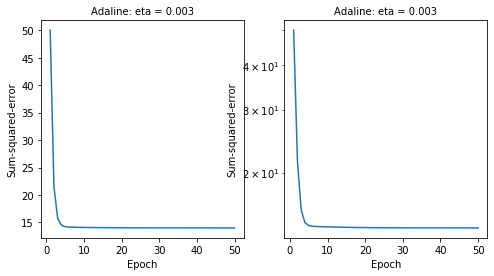

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

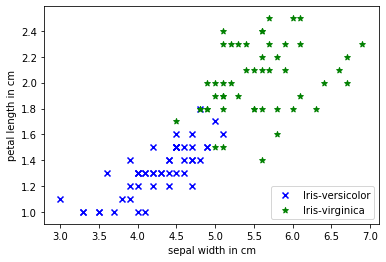

In [66]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx4[0]])
plt.ylabel(IrisF[fdx4[1]])
plt.legend(loc='lower right')
plt.show()

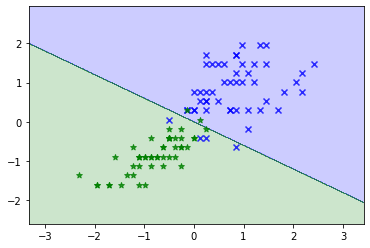

In [67]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [68]:
print(ada.accuracy(NF_Std, NC))

0.94


# ====4 Cases using 3 features====

## Sepal Length vs Sepal Width vs Petal Length

In [74]:
fdx7 = np.array([0,1,2])

In [75]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx7)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx7)):
            NF[j,k] = IA[i,fdx7[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx7)):
                NF[j,k] = IA[i,fdx7[k]]
        j += 1
    i += 1

In [80]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

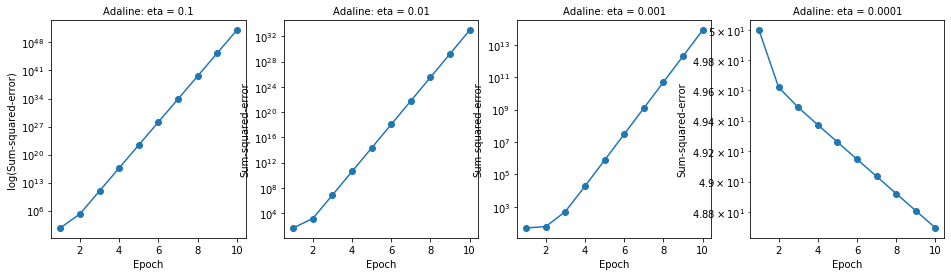

In [77]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

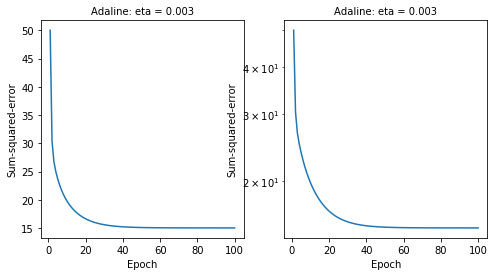

In [81]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [83]:
print(ada.accuracy(NF_Std, NC))

0.9299999999999999


## Sepal Length vs Sepal Width vs Petal Width

In [91]:
fdx8 = np.array([0,1,3])
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx8)):
            NF[j,k] = IA[i,fdx8[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx8)):
                NF[j,k] = IA[i,fdx8[k]]
        j += 1
    i += 1

In [96]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

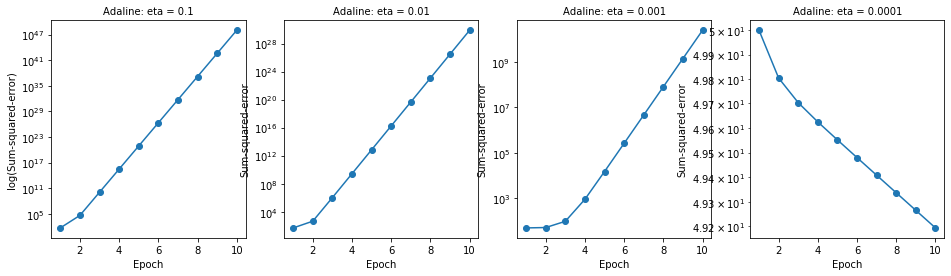

In [97]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

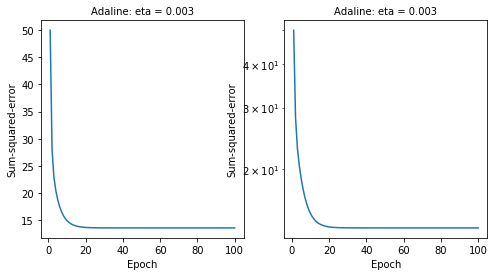

In [98]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [99]:
print(ada.accuracy(NF_Std, NC))

0.95


## Sepal Length vs Petal Length vs Petal Width

In [114]:
fdx9 = np.array([0,2,3])

In [115]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx9)):
            NF[j,k] = IA[i,fdx9[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx9)):
                NF[j,k] = IA[i,fdx9[k]]
        j += 1
    i += 1

In [116]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

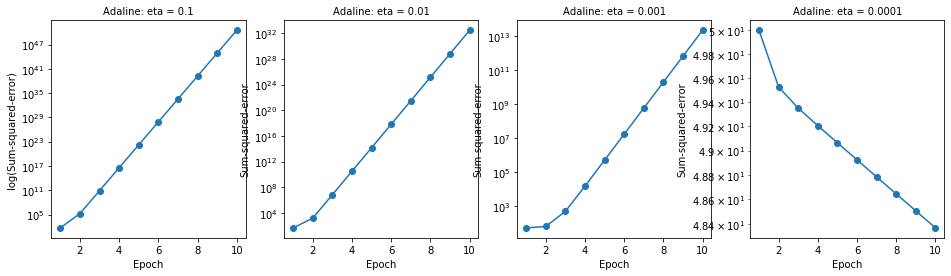

In [117]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

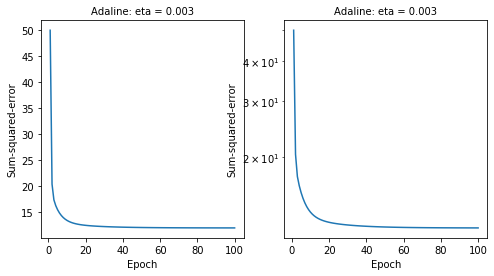

In [118]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [119]:
print(ada.accuracy(NF_Std, NC))

0.97


## Sepal Width vs Petal Length vs Petal Width

In [120]:
fdx10 = np.array([1,2,3])

In [121]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx10)):
            NF[j,k] = IA[i,fdx10[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx10)):
                NF[j,k] = IA[i,fdx10[k]]
        j += 1
    i += 1

In [122]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

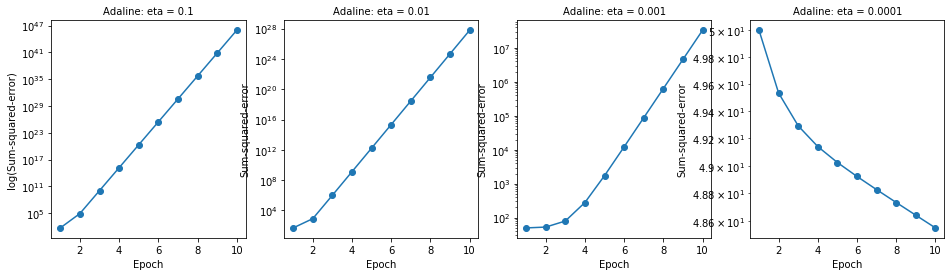

In [123]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

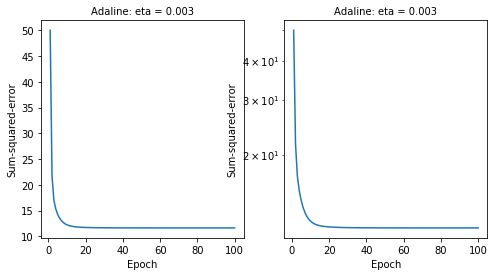

In [124]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [125]:
print(ada.accuracy(NF_Std, NC))

0.96


# ====1 Case 4 Features====

In [135]:
fdx11 = np.array([0,1,2,3])

In [137]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 4))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx11)):
            NF[j,k] = IA[i,fdx11[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx11)):
                NF[j,k] = IA[i,fdx11[k]]
        j += 1
    i += 1

In [138]:
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()

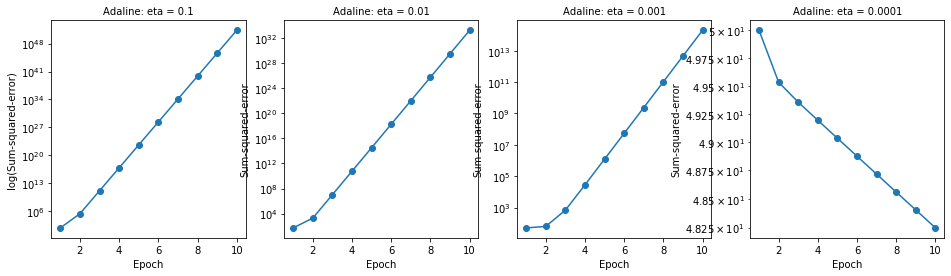

In [139]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

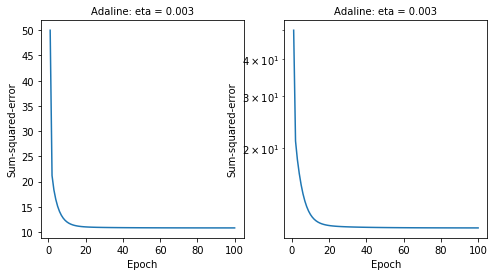

In [140]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [141]:
print(ada.accuracy(NF_Std, NC))

0.97


# ==== Summary ====

In this assignment, the task was to compare iris virginica to iris versicolor and to test the accuracy. As we used more features, there were more improvements to the accuracy with the accuracy peaking at 97%. So given that using 4 features gives us 97%, we can assume that using more dimensions help whne trying to classifcy the data in datasets. 

In the charts shown above, we can also notice that the lowest accuracy scored was 75% which was done when comparing sepal width with sepal length. This indicates that certain comparisons are more beneficial than others when trying to test for accuracy 